<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/c1w4_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
print (tf.__version__)

2.3.0


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Loading and inspect CIFAR-10 dataset

In [40]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [41]:
x_train=x_train[:10000]
y_train=y_train[:10000]

x_test=x_test[:1000]
y_test=y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)
(10000, 1)
(1000, 1)


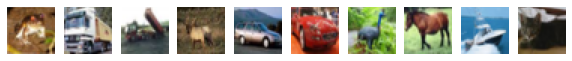

In [42]:
fig, ax = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  ax[i].set_axis_off()
  ax[i].imshow(x_train[i])
plt.show()

In [43]:
tf.keras.backend.clear_session()

In [44]:
def get_model():
  model = Sequential([
                      Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),
                             activation='relu'),
                      Conv2D(16, kernel_size=(3,3), activation='relu'),
                      MaxPool2D(pool_size=(4,4)),
                      Flatten(),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])

  #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Save Model-Load Model is not working with just "accuracy". It has to be below
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
  return model

In [45]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 30,970
Trainable params: 30,970
Non-trainable params: 0
____________________________________________________

In [46]:
def print_test_accuracy(model, x_test, y_test):
  loss, acc = model.evaluate(x_test, y_test)
  print(f"Test Accuracy= {acc:0.3}")


In [47]:
#test accuracy on an untrained model
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 2.3011 - sparse_categorical_accuracy: 0.1130
Test Accuracy= 0.113


In [48]:
checkpoint_path = 'sample_data/model_checkpoint/checkpoint'
checkpoint = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

history = model.fit(x_train, y_train, epochs=10, callbacks=[checkpoint], validation_split=0.10, verbose=False)


Epoch 00001: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00002: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00003: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00004: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00005: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00006: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00007: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00008: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00009: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00010: saving model to sample_data/model_checkpoint/checkpoint


In [49]:
!ls -lh sample_data/model_checkpoint

total 376K
-rw-r--r-- 1 root root   77 Oct  9 17:24 checkpoint
-rw-r--r-- 1 root root 367K Oct  9 17:24 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct  9 17:24 checkpoint.index


In [50]:
#test accuracy on a trained model
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.2094 - sparse_categorical_accuracy: 0.5800
Test Accuracy= 0.58


In [51]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.940259,0.291667,1.720653,0.366
1,1.579363,0.433222,1.532212,0.437
2,1.430055,0.493333,1.449386,0.488
3,1.319872,0.526111,1.382089,0.484
4,1.252040,0.553000,1.365201,0.510


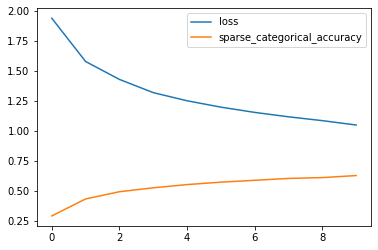

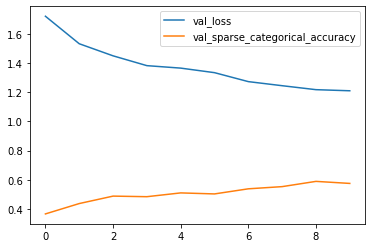

In [52]:
df[['loss', 'sparse_categorical_accuracy']].plot()
df[['val_loss', 'val_sparse_categorical_accuracy']].plot()

In [53]:
model = get_model()
model.load_weights(checkpoint_path)

In [54]:
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 1.2094 - sparse_categorical_accuracy: 0.5800
Test Accuracy= 0.58


In [55]:
!mkdir sample_data/model_checkpoint

mkdir: cannot create directory ‘sample_data/model_checkpoint’: File exists


In [56]:
#When saving in HDF5 format, the folder is not created. So create the folder with the above command and run the cell
#checkpoint_path1 = 'sample_data/model_checkpoint/checkpoint.h5'
#checkpoint_path1 = 'sample_data/model_checkpoint/checkpoint-{epoch}.h5'
checkpoint_path1 = 'sample_data/model_checkpoint/'
checkpoint1 = ModelCheckpoint(checkpoint_path1, save_weights_only=True, verbose=1)

model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint1], batch_size=128)

Epoch 1/3
74/79 [===========================>..] - ETA: 0s - loss: 0.9866 - sparse_categorical_accuracy: 0.6547
Epoch 00001: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 6ms/step - loss: 0.9850 - sparse_categorical_accuracy: 0.6559
Epoch 2/3
76/79 [===========================>..] - ETA: 0s - loss: 0.9706 - sparse_categorical_accuracy: 0.6630
Epoch 00002: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9696 - sparse_categorical_accuracy: 0.6632
Epoch 3/3
78/79 [============================>.] - ETA: 0s - loss: 0.9592 - sparse_categorical_accuracy: 0.6669
Epoch 00003: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9590 - sparse_categorical_accuracy: 0.6670


In [57]:
!ls -lh sample_data/model_checkpoint

total 376K
-rw-r--r-- 1 root root   59 Oct  9 17:24 checkpoint
-rw-r--r-- 1 root root 367K Oct  9 17:24 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct  9 17:24 checkpoint.index


In [58]:
model.load_weights(checkpoint_path1)
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1921 - sparse_categorical_accuracy: 0.5850
Test Accuracy= 0.585


## Save the whole model

In [59]:
model_path = 'sample_data/mymodel'
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
79/79 [==============================] - 0s 5ms/step - loss: 0.9502 - sparse_categorical_accuracy: 0.6696
Epoch 2/3
79/79 [==============================] - 0s 5ms/step - loss: 0.9413 - sparse_categorical_accuracy: 0.6724
Epoch 3/3
79/79 [==============================] - 0s 5ms/step - loss: 0.9284 - sparse_categorical_accuracy: 0.6736


In [60]:
!ls -lh sample_data/mymodel

ls: cannot access 'sample_data/mymodel': No such file or directory


In [61]:
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1917 - sparse_categorical_accuracy: 0.5950
Test Accuracy= 0.595


In [62]:
model.save(model_path)

INFO:tensorflow:Assets written to: sample_data/mymodel/assets


In [63]:
#del model1

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model1 = load_model(model_path)
print_test_accuracy(model1, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1917 - sparse_categorical_accuracy: 0.5950
Test Accuracy= 0.595


In [66]:
model_path = 'sample_data/mymodel'
checkpoint_path = 'sample_data/model_checkpoint/'
checkpoint = ModelCheckpoint(checkpoint_path1, save_weights_only=True, verbose=1)
model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint], batch_size=128)

Epoch 1/3
75/79 [===========================>..] - ETA: 0s - loss: 0.9235 - sparse_categorical_accuracy: 0.6775
Epoch 00001: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9228 - sparse_categorical_accuracy: 0.6775
Epoch 2/3
78/79 [============================>.] - ETA: 0s - loss: 0.9136 - sparse_categorical_accuracy: 0.6845
Epoch 00002: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9133 - sparse_categorical_accuracy: 0.6846
Epoch 3/3
76/79 [===========================>..] - ETA: 0s - loss: 0.9008 - sparse_categorical_accuracy: 0.6839
Epoch 00003: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9039 - sparse_categorical_accuracy: 0.6830


In [67]:
!ls -lh sample_data/mymodel/

total 128K
drwxr-xr-x 2 root root 4.0K Oct  9 17:24 assets
-rw-r--r-- 1 root root 120K Oct  9 17:24 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct  9 17:24 variables


In [68]:
del model1
model1 = load_model(model_path)
print_test_accuracy(model1, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1917 - sparse_categorical_accuracy: 0.5950
Test Accuracy= 0.595


In [69]:
rm -r sample_data/model_checkpoint

In [70]:
rm -r sample_data/mymodel

In [71]:
!ls -lh sample_data/model_checkpoint

ls: cannot access 'sample_data/model_checkpoint': No such file or directory


# Loading pre-trained Keras model 

In [105]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
model = ResNet50(include_top=True, weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [81]:
lemon_img = image.load_img('./sample_data/mydata/lemon.jpeg', target_size=(224, 224))
bicyle_img = image.load_img('./sample_data/mydata/bicyle.jpeg', target_size=(224, 224))
satellite_img = image.load_img('./sample_data/mydata/satellite.jpeg', target_size=(224, 224))

In [115]:
def get_top5_predictions(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  img = img_to_array(img)
  img = preprocess_input(img[np.newaxis,...])
  pred = model.predict(img)
  decode_pred = decode_predictions(pred, top=5)
  top_preds = pd.DataFrame(columns=['prediction', 'probability'])
  for i in range(5):
    top_preds.loc[i+1, 'prediction'] = decode_pred[0][i][1]
    top_preds.loc[i+1, 'probability'] = decode_pred[0][i][2]
  return top_preds

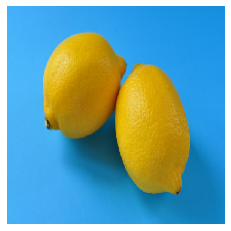

,prediction,probability
1,lemon,0.990852
2,orange,0.00844569
3,yellow_lady's_slipper,0.000141237
4,slug,0.000132506
5,banana,0.000131688


In [116]:
get_top5_predictions(lemon_img)

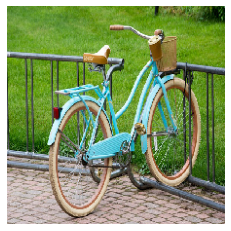

,prediction,probability
1,bicycle-built-for-two,0.61229
2,tricycle,0.225838
3,mountain_bike,0.0382593
4,moped,0.0208128
5,lakeside,0.00529332


In [117]:
get_top5_predictions(bicyle_img)

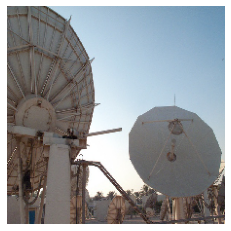

,prediction,probability
1,radio_telescope,0.980788
2,solar_dish,0.0191055
3,sundial,1.92972e-05
4,radio,1.74103e-05
5,dome,1.5804e-05


In [119]:
get_top5_predictions(satellite_img)

In [120]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [121]:
model = VGG16(include_top='True', weights='imagenet')
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

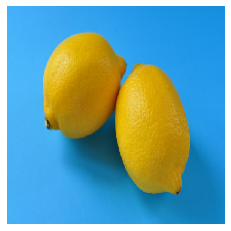

,prediction,probability
1,lemon,0.878007
2,orange,0.115037
3,jackfruit,0.00153485
4,banana,0.00118118
5,ice_lolly,0.00116708


In [122]:
get_top5_predictions(lemon_img)

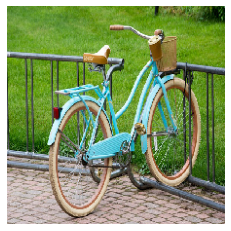

,prediction,probability
1,bicycle-built-for-two,0.602298
2,tricycle,0.180432
3,mountain_bike,0.0314553
4,turnstile,0.0314368
5,parallel_bars,0.0192093


In [123]:
get_top5_predictions(bicyle_img)

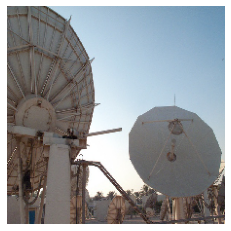

,prediction,probability
1,solar_dish,0.608276
2,radio_telescope,0.387307
3,dome,0.00127131
4,analog_clock,0.00060776
5,sundial,0.0005762


In [124]:
get_top5_predictions(satellite_img)